In [56]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

In [57]:
def resize_array(arr, size=(224, 224)):
    # asegurar byte order nativo
    if not arr.dtype.isnative:
        arr = arr.astype(arr.dtype.newbyteorder('='))

    x = torch.from_numpy(arr).float()
    x = x.unsqueeze(0).unsqueeze(0)  # (1, 1, H, W)

    x_resized = F.interpolate(
        x,
        size=size,
        mode='bilinear',
        align_corners=False
    )

    return x_resized.squeeze().numpy()

In [58]:
files =["MorphoSPLUS_17_DR4_3_STRIPE82-0019_0020610_real_g.fits","MorphoSPLUS_17_DR4_3_STRIPE82-0019_0020610_model_g.fits","MorphoSPLUS_17_DR4_3_STRIPE82-0019_0020610_resid_g.fits"]

In [62]:
names = ["real","model","resid"]

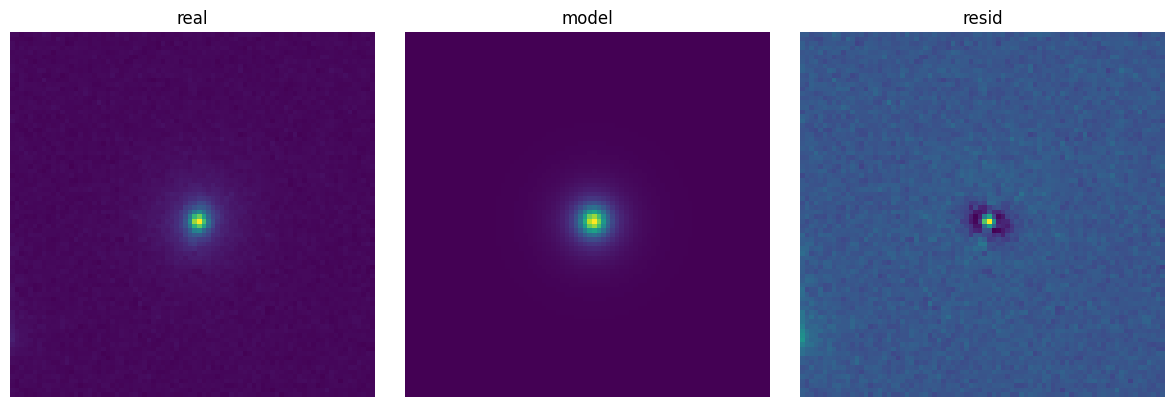

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    hdul = fits.open(f"resize_data_example/{files[i]}")
    data = hdul[0].data
    
    axes[i].imshow(data, cmap='viridis')
    axes[i].set_title(f'{names[i]}')
    axes[i].axis('off')
    
    hdul.close()

plt.tight_layout()
plt.show()


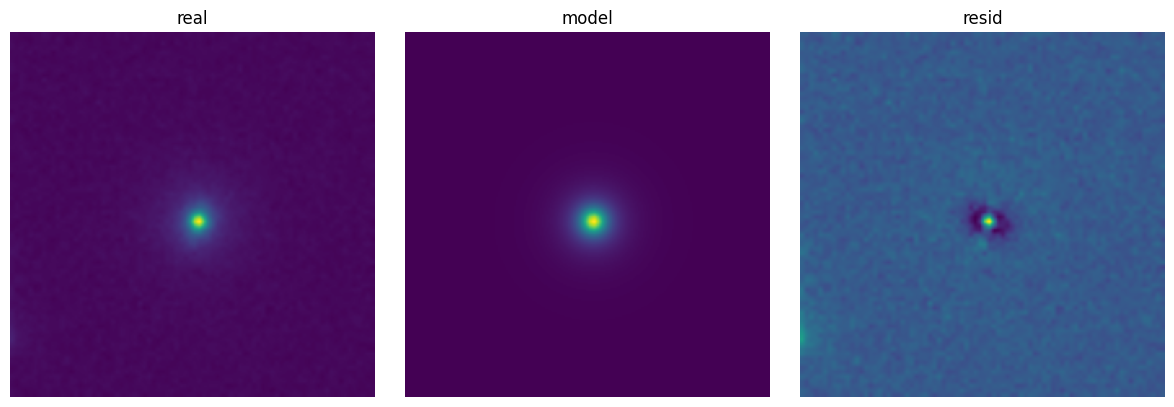

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    hdul = fits.open(f"resize_data_example/{files[i]}")
    data = hdul[0].data
    data_resized = resize_array(data) 
    axes[i].imshow(data_resized, cmap='viridis')
    axes[i].set_title(f'{names[i]}')
    axes[i].axis('off')
    
    hdul.close()

plt.tight_layout()
plt.show()





In [68]:
channels = []

for i in range(3):
    hdul = fits.open(f"resize_data_example/{files[i]}")
    data = hdul[0].data.astype(np.float32)
    hdul.close()

    data_resized = resize_array(data)  # (224, 224)
    channels.append(data_resized)

# apilar como RGB → (224, 224, 3)
rgb_image = np.stack(channels, axis=-1)

# si ya están normalizadas entre 0 y 1, no hace falta reescalar
plt.imsave("resize_data_example/rgb_image.png", rgb_image)


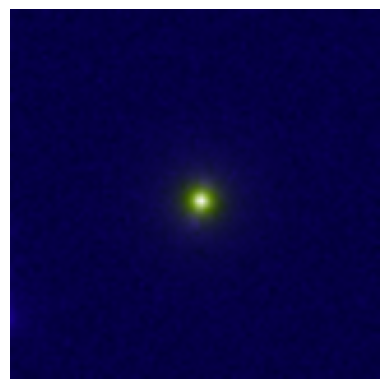

(224, 224, 4)


In [69]:
# cargar imagen
img = plt.imread("resize_data_example/rgb_image.png")

# mostrar
plt.imshow(img)
plt.axis("off")
plt.show()

# mostrar shape
print(img.shape)


In [70]:
ls

Resize_image.ipynb   resize_data_example/
